In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F

data = torch.from_numpy(np.loadtxt('../data/age_data_3.txt')).to(torch.float32)
inputs, targets = data.T

### Camada linear do Pytorch

In [2]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.8749]], requires_grad=True)
Parameter containing:
tensor([-0.8392], requires_grad=True)


Funções de loss:
* BCE: Binary Cross Entropy loss
* CrossEntropy: Cross Entropy loss (multiclass)

In [4]:
inputs = inputs.reshape(len(inputs), 1)
targets = targets.reshape(len(targets),1)

with torch.no_grad():
    scores = model(inputs)
    scores_test = model.weight*inputs + model.bias
    
print(scores[:10])
print(scores_test[:10])


tensor([[-2.0466],
        [-1.9241],
        [-1.9766],
        [-2.0816],
        [-2.0554],
        [-1.8016],
        [-1.9766],
        [-1.8716],
        [-1.8804],
        [-1.9241]])
tensor([[-2.0466],
        [-1.9241],
        [-1.9766],
        [-2.0816],
        [-2.0554],
        [-1.8016],
        [-1.9766],
        [-1.8716],
        [-1.8804],
        [-1.9241]])


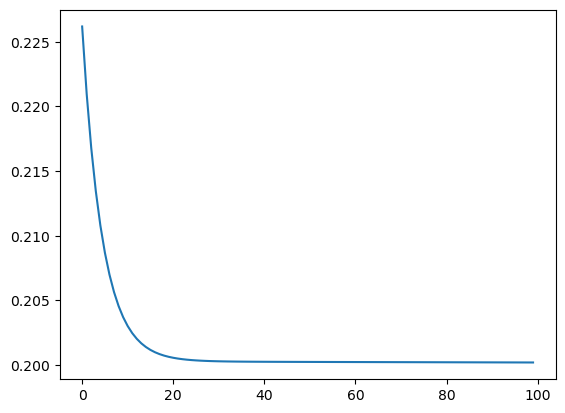

In [8]:
import tqdm as notebook_tqdm

def train(model, inputs, targets, lr, num_epochs):
    loss_func = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(model.parameters(),lr=lr)
    losses = []
    for epoch in range(num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss.item())
        
    return losses        

with torch.no_grad():
    model.weight[:] = 19.
    model.bias[:] = -25.
losses = train(model, inputs, targets, lr=0.5, num_epochs=100)
plt.plot(losses)